In [7]:
from __future__ import division
%run "! DEFAULT PLOT THINGIES.ipynb"
%run "../! DEFAULT PLOT THINGIES.ipynb"

<IPython.core.display.Javascript object>

Current working directory is now c:\users\deen\dropbox\phd rearrangements\thesis\notebooks\response-to-shear
Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


<IPython.core.display.Javascript object>

Current working directory is now c:\users\deen\dropbox\phd rearrangements\thesis\notebooks\response-to-shear
Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


In [3]:
mask = (dataN == 256) * (datalP == -6)
sdata = summ[mask]
print sum(mask)

899


In [4]:
# maximale strain, minimale stress jump. Kan dat?
idx = np.argmax(sdata["gamma_min"])
print sdata[idx]["gamma_min"]
print sdata[idx]["s_xy_plus"] - sdata[idx]["s_xy_min"]

print sdata[idx]["num"]

9.84974285063e-06
1.48549203836e-15
9469


In [5]:
f = tables.File(base + "h5/N256~P1e-6_shear.h5")
packing = f.root.__getattr__('N256').__getattr__('P1e-6').__getattr__('9469')

In [6]:
from hdf_tools import getcc
befores, afters = getcc.get_first_ccs(packing)
print befores[-1]
print afters[0]
print "----"
print befores[1]
print afters[1]

(37.66072471994472, [37.663151256613645, 0.0], [-0.0016116994980835, 37.65829833961109], 256L, 9.968794252995707e-07, 1.0000000000000008e-06, 9.84974285063064e-06, 2.729397752287792e-09, 495L, 0L, 0L, 0L, 4.008097165991903, 25L, -4.279523323219385e-05, -6.442734046325217e-05, 0.8392168734608165, 9L, -9.883729636334686e-07, -1.0053858869656722e-06, 1.9804146310830234e-09, 4.185980474762238e-17, 0.0014183321668460875, 4.186682687953033e-17, 1L, 1000L, 0L, 2.4188896226545728e-15, '2012-05-26_16-00-50', '/N256/P1e-6/9469/SR/0025')
(37.66072471994472, [nan, nan], [nan, nan], 256L, 9.968794262651752e-07, 1.0000000000000008e-06, 9.849748257934754e-06, 2.7293992377798303e-09, 494L, 1L, 0L, 1L, 4.0, 26L, -4.279522782488975e-05, -6.442734046325217e-05, 0.8392168734608165, 9L, -9.883729606732736e-07, -1.0053858918570767e-06, 1.980414652025424e-09, 2.094240129087016e-17, 0.0014183321668461086, 2.0927431269575185e-17, 1L, 1000L, 0L, 4.112151732423668e-15, '2012-05-26_16-00-51', '/N256/P1e-6/9469/SR

d:/my documents/phd-library\hdf_tools\getcc.py:53: UserWarning: Using convergence derivation instead of ccnum
  warnings.warn("Using convergence derivation instead of ccnum")


\includegraphics{notebooks/response-to-shear/stress-enthalpy-vs-shear.pdf}


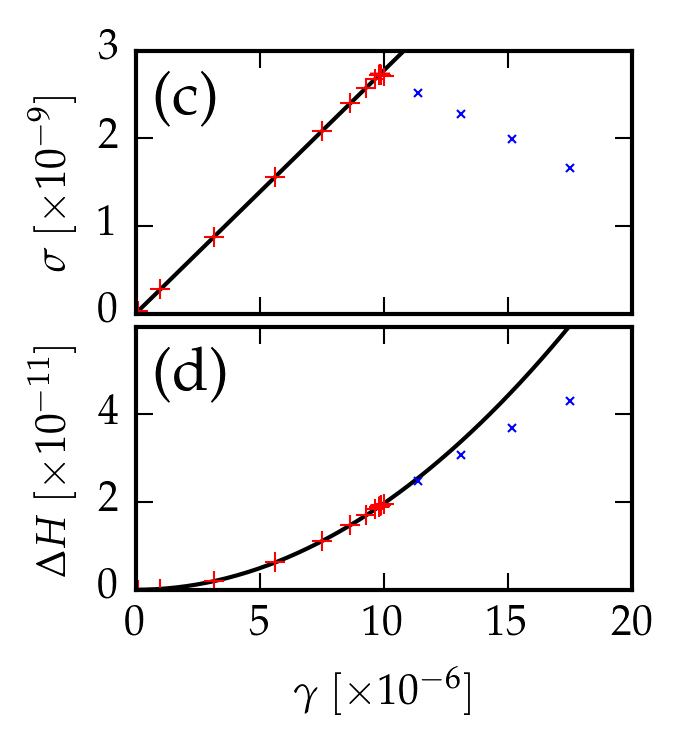

In [9]:
# we willen dus alle states t/m 26 plotten in de stress-graph

dataset = packing.SR.data.read()
#dataset = dataset[:26]



gammamin = 0
gammamax = 0.00002

factor = 1e-6
xticks = np.array([0,5,10,15,20]) * factor
xticklabels = [str(int(x)) for x in xticks/factor]


halffig()
ax1 = plt.subplot(2,1,1)
ax2 = plt.subplot(2,1,2, sharex=ax1)

ax1.set_xticks(xticks)
ax1.set_xticklabels(xticklabels)
plt.setp(ax1.get_xticklabels(), visible=False)
#ax1.set_xlabel(r"$\gamma~[10^{-6}]$")

factor = 1e-9
yticks = np.array([0,1,2,3]) * factor
yticklabels = [str(int(y)) for y in yticks/factor]
ax1.set_yticks(yticks)
ax1.set_yticklabels(yticklabels)
ax1.set_ylabel(r"$\sigma~[\times 10^{-9}]$")

ax1.axis(xmin=gammamin, xmax=gammamax)
ax1.axis(ymin=0, ymax=3e-9)

x = np.linspace(gammamin,gammamax)
y = x * (dataset["s_xy"][25] / dataset["gamma"][25])
ax1.plot(x,y, "k")

ax1.plot(dataset["gamma"][:26], dataset["s_xy"][:26], "r+", ms=5)
ax1.plot(dataset["gamma"][26:], dataset["s_xy"][26:], "bx", ms=2)


ax2.set_xticks(xticks)
ax2.set_xticklabels(xticklabels)
ax2.set_xlabel(r"$\gamma~[\times 10^{-6}]$")

factor = 1e-11
yticks = np.array([0,2,4]) * factor
yticklabels = [str(int(y)) for y in yticks/factor]
ax2.set_yticks(yticks)
ax2.set_yticklabels(yticklabels)
ax2.set_ylabel(r"$\Delta H~[\times 10^{-11}]$")

ax2.axis(xmin=gammamin, xmax=gammamax)
ax2.axis(ymin=0, ymax=6e-11)

Hmin = dataset["H"][0] #sdata[i]["H_base"]

x = np.linspace(gammamin,gammamax)
y = 0.5 * x * (x * (dataset["s_xy"][25] / dataset["gamma"][25])) * sdata[idx]["L_base"]**2
ax2.plot(x,y, "k")

ax2.plot(dataset["gamma"][:26], dataset["H"][:26]-Hmin, "r+", ms=5)
ax2.plot(dataset["gamma"][26:], dataset["H"][26:]-Hmin, "bx", ms=2)

plt.subplots_adjust(hspace=0.05)

ax1.text(0.04,0.92, r'(c)',
            transform=ax1.transAxes,
            verticalalignment='top',
            horizontalalignment='left',
            size='x-large',
            zorder=-1)

ax2.text(0.04,0.92, r'(d)',
            transform=ax2.transAxes,
            verticalalignment='top',
            horizontalalignment='left',
            size='x-large')

plt.savefig("stress-enthalpy-vs-shear.pdf")

\includegraphics{notebooks/response-to-shear/shear-vs-step.pdf}


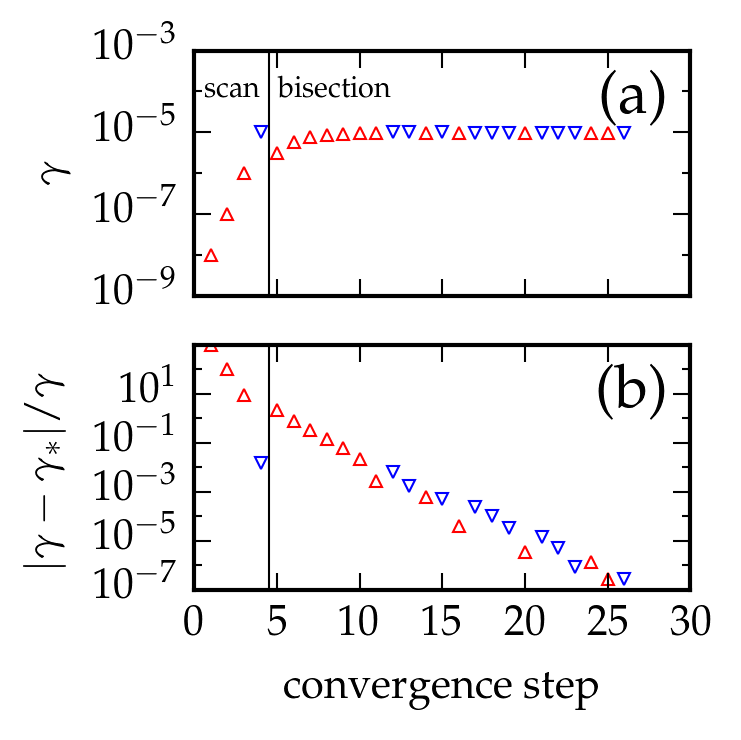

In [26]:
# we willen dus alle states t/m 26 plotten in de stress-graph

dataset = packing.SR.data.read()
#dataset = dataset[:26]

gammamin = 0
gammamax = 0.00002

endgamma = 0.5*(sdata[idx]["gamma_min"] + sdata[idx]["gamma_plus"])

halffig()
ax1 = plt.subplot(2,1,1)
ax2 = plt.subplot(2,1,2, sharex=ax1)

ax1.set_ylabel(r"$\gamma$")
ax1.semilogy()

ax1.axis(ymin=1e-9, ymax=1e-3)
ax1.set_yticks([1e-9,1e-7,1e-5,1e-3])
ax1.set_yticks([1e-8,1e-6,1e-4], minor=True)

mx = 50

step = np.arange(1,27)

for s,d in zip(step, dataset[:26]):
    g = d['gamma']
    marker = 'v' if g > endgamma else '^'
    mec = 'b' if g > endgamma else 'r'
    ax1.plot(s, g, marker, color='w', mec=mec, ms=3)
    

plt.setp(ax1.get_xticklabels(), visible=False)


for s,d in zip(step, dataset[:26]):
    g = d['gamma']
    reldiff = abs(g - endgamma)/g
    
    marker = 'v' if g > endgamma else '^'
    mec = 'b' if g > endgamma else 'r'
    ax2.plot(s, reldiff, marker, color='w', mec=mec, ms=3)


ax2.semilogy()
ax2.axis(ymin=1e-7, ymax=1e3)
ax2.set_yticks([1e-7,1e-5,1e-3,1e-1,1e1])
ax2.set_yticks([1e-6,1e-4,1e-2,1e0,1e2], minor=True)
ax2.set_ylabel(r"$|\gamma - \gamma_*|/\gamma$")
ax2.set_xlabel("convergence step")
#ax1.plot(dataset["gamma"][26:], dataset["s_xy"][26:], "bx", ms=2)

ax1.text(0.96,0.92, r'(a)',
            transform=ax1.transAxes,
            verticalalignment='top',
            horizontalalignment='right',
            size='x-large',
            zorder=-1)

ax2.text(0.96,0.92, r'(b)',
            transform=ax2.transAxes,
            verticalalignment='top',
            horizontalalignment='right',
            size='x-large')

ax1.text(4, 1e-4, 'scan', 
         verticalalignment='center',
         horizontalalignment='right',
         size='x-small',
)

ax1.text(5, 1e-4, 'bisection', 
         verticalalignment='center',
         horizontalalignment='left',
         size='x-small',
)

ax1.axvline(4.5, color='k', lw=0.5)
ax2.axvline(4.5, color='k', lw=0.5)

plt.savefig("shear-vs-step.pdf")

C:\Python27\lib\site-packages\ipykernel\__main__.py:27: DeprecationWarning: _f_getAttr() is pending deprecation, use _f_getattr() instead. You may use the pt2to3 tool to update your source code.
C:\Python27\lib\site-packages\ipykernel\__main__.py:28: DeprecationWarning: _f_getAttr() is pending deprecation, use _f_getattr() instead. You may use the pt2to3 tool to update your source code.
C:\Python27\lib\site-packages\ipykernel\__main__.py:35: DeprecationWarning: _f_getAttr() is pending deprecation, use _f_getattr() instead. You may use the pt2to3 tool to update your source code.
C:\Python27\lib\site-packages\ipykernel\__main__.py:36: DeprecationWarning: _f_getAttr() is pending deprecation, use _f_getattr() instead. You may use the pt2to3 tool to update your source code.


\includegraphics{notebooks/response-to-shear/shear-deformation.pdf}


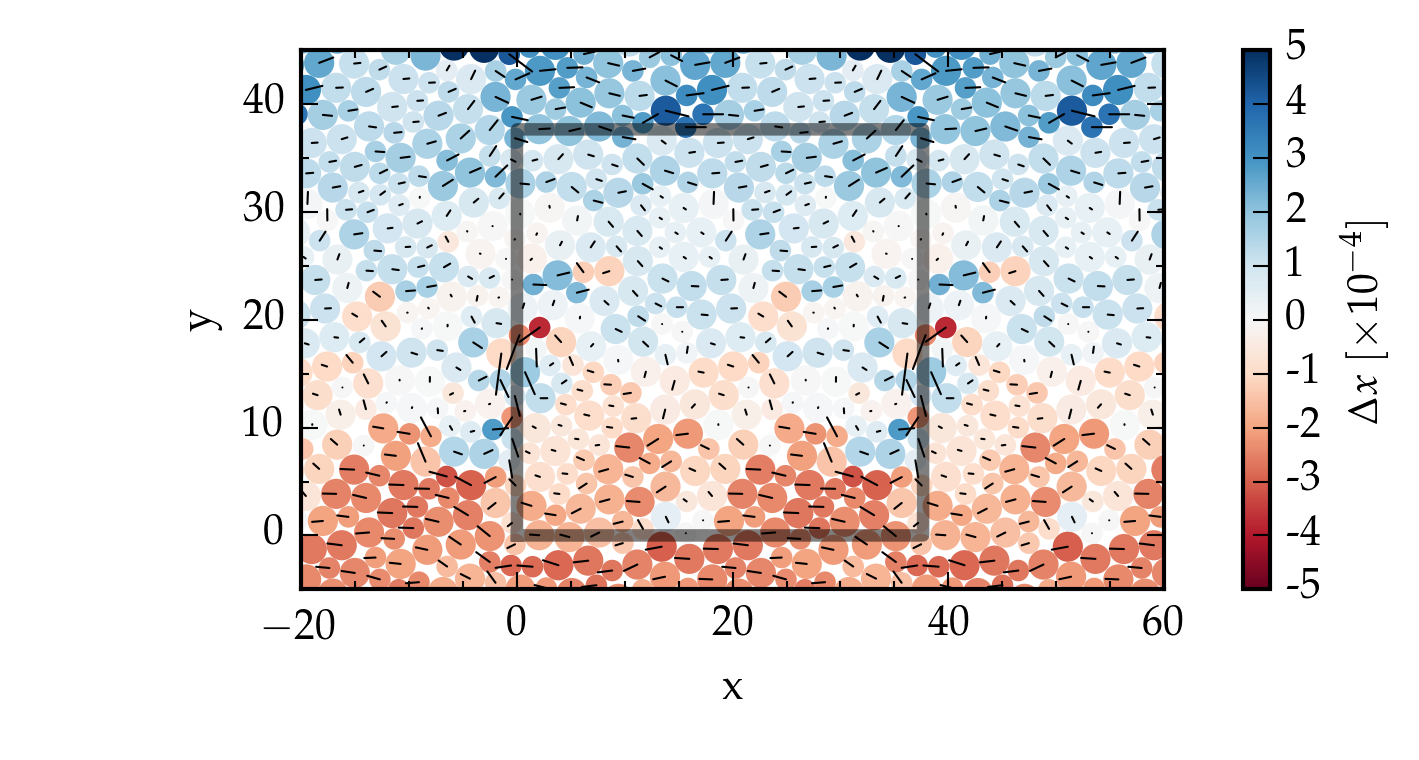

In [11]:
# particle graph

fullfig()
ax = plt.subplot(111, aspect='equal')
plt.subplots_adjust(left=-0.1)
#plt.axes([0, 0.05, 1,  0.9 ], aspect='equal')

f_base = tables.File(base + "h5/N256~P1e-6_tables.h5")
base_packing = next(iter(f_base.root.__getattr__('N256'))).__getattr__('9469')
particles = base_packing.particles.read()
x0 = particles['x']
y0 = particles['y']
r0 = particles['r']

event_packing = packing.SR.__getattr__('0025')
particles = event_packing.particles.read()
x1 = particles['x']
y1 = particles['y']
r1 = particles['r']

dx = (x1-x0)
dy = (y1-y0)

magnify = 5000

from packing_tools.make_shear_graphs import plotparticle
L1 = base_packing._f_getAttr('L1')
L2 = base_packing._f_getAttr('L2')

xmin = -20
xmax = 60
ymin = -5
ymax = 45

dx_over_y_boundary = (event_packing._f_getAttr('L2') - L2)
dgamma = dx_over_y_boundary[0] / event_packing._f_getAttr('L2')[1]

cmap = matplotlib.cm.RdBu
norm = matplotlib.colors.Normalize(vmin=-5e-4, vmax=5e-4)

color_mapper = lambda x: cmap(norm(x))

for offset_num in [(-1,0), (0,-1), (-1,1), (1,-1), (-1,-1), (1,0), (0,1), (1,1), (0,0)]:
    offset = (L1 * offset_num[0] + L2 * offset_num[1])
    
    for i in np.arange(len(x1)):
        if ((x0[i] + offset[0]) > xmax+5) or ((x0[i] + offset[0]) < xmin-5) or \
           ((y0[i] + offset[1]) > ymax+5) or ((y0[i] + offset[1]) < ymin-5):
                continue
        
        if offset_num == (0,0):
            color = 'gray'
        else:
            color = 'lightgray'
            
        real_dx = dx[i] + dx_over_y_boundary[0]*offset_num[1]
        color = color_mapper(real_dx)
        
        circ=pylab.Circle((x0[i] + offset[0], y0[i] + offset[1]), radius=r0[i], lw=0, fc=color)
        ax=gca()
        ax.add_patch(circ)


        if ((x0[i] + offset[0]) > xmax) or ((x0[i] + offset[0]) < xmin) or \
           ((y0[i] + offset[1]) > ymax) or ((y0[i] + offset[1]) < ymin):
                continue
                
        plt.annotate("",
            (x0[i] + magnify * (real_dx) + offset[0], y0[i] + magnify*dy[i] + offset[1]),
            (x0[i] + offset[0], y0[i] + offset[1]),
            xycoords='data',
            textcoords='data',
            arrowprops=dict(arrowstyle="-", lw=0.5, ec='k', fc='w', mutation_scale=3, shrinkA=0, shrinkB=0),
        )
            
plt.axis(xmin=xmin,xmax=xmax,ymin=ymin,ymax=ymax)
plt.gca().set_xticks([-20,0,20,40,60])
plt.gca().set_xticks(np.arange(-20,61,5), minor=True)
plt.gca().set_yticks([0,10,20,30,40])
plt.gca().set_yticks(np.arange(-5,46,5), minor=True)
plt.gca().set_ylabel("y")
plt.gca().set_xlabel("x")
plt.scatter([-100], [-100], c=[0], cmap=cmap, norm=norm)
Lxx,Lxy = L1
Lyx,Lyy = L2

plt.plot([0,Lxx,Lxx+Lyx,Lyx,0], [0,0,Lyy,Lyy,0], color=(0,0,0,0.5), lw=3)

cb = plt.colorbar()

xt = np.arange(-5,6)

cb.set_ticks(xt*1e-4)
cb.set_ticklabels(["%i" % t for t in xt])
cb.set_label(r"$\Delta x~[\times 10^{-4}]$")

plt.savefig('shear-deformation.pdf')